In [1]:
def push(message):
    """
    Save current notebook and push whole current dir to origin/master
    
    Param:
        message : str 
            Commit's message
    
    Return:
        None
    """
    assert(len(message.strip())>10)
    import subprocess
    from IPython.display import display, Javascript
    
    cmds = [  "git add .",
              "git commit -m ", 
              "git push"]
    
    # save current notebook
    display(Javascript('IPython.notebook.save_checkpoint();'))
    for cmd in cmds:
        cmd = cmd.split()
        if "commit" in cmd: 
            cmd.append( f"'{message}'") 
        print(" ".join(cmd))
        subprocess.check_output(cmd)
    print("Fini.")

# 1) numpy

In [2]:
import numpy as np

In [3]:
array = np.arange(0,10)

In [4]:
array.ndim

1

In [5]:
array.size

10

In [6]:
array.dtype

dtype('int64')

# 2) conversion d'une liste de liste en array numpy

In [7]:
matrice = np.asarray([[1,2,3],[4,5,6]])

In [8]:
matrice.dtype, matrice.ndim

(dtype('int64'), 2)

In [9]:
matrice.shape

(2, 3)

# 3) Pandas

In [10]:
### Nb: si pandas n'est pas installée, installer avec "pip install pandas"
# pip install --upgrade pandas
!pip install pandas

In [11]:
push("pour suivre")

<IPython.core.display.Javascript object>

git add .
git commit -m 'pour suivre'
git push
Fini.


## 3.0) loader la librairie

In [12]:
import pandas as pd

#### Regarder les versions d'une librairie

In [13]:
np.__version__

'1.19.2'

In [14]:
pd.__version__ 

'1.2.4'

## 3.1) création d'une dataframe à partir d'un dico 

In [15]:
métiers = ["journaliste", "capitaine"]
noms    = ["tintin", "hadock"]
personnages = {"métiers" : métiers, 
               "noms":noms}

In [16]:
personnages

{'métiers': ['journaliste', 'capitaine'], 'noms': ['tintin', 'hadock']}

In [17]:
df = pd.DataFrame(personnages)

In [18]:
df

métiers    noms
0  journaliste  tintin
1    capitaine  hadock

## 3.2) regardons les attributs

In [19]:
df.shape

(2, 2)

In [20]:
df.columns

Index(['métiers', 'noms'], dtype='object')

In [21]:
df.index

RangeIndex(start=0, stop=2, step=1)

In [22]:
df.index.name

## 3.3) nommons les index

In [24]:
df.columns.name = "hergé"

In [26]:
df.index.name = "numéro"
df

hergé       métiers    noms
numéro                     
0       journaliste  tintin
1         capitaine  hadock

## 3.3 bis) enregistrer sous excel

In [42]:
df.to_excel("herge.xlsx")

In [41]:
!open herge.xlsx

## 3.4) récupérer une colonne

In [35]:
col_1 = df["métiers"] # récupérer la colonne "métiers"

In [36]:
type(col_1) # une datframe est composée de Série(s)

pandas.core.series.Series

In [37]:
col_1

numéro
0    journaliste
1      capitaine
Name: métiers, dtype: object

In [39]:
col_2 = df["noms"]
col_2

numéro
0    tintin
1    hadock
Name: noms, dtype: object

## 3.5) ajout de colonnes

In [43]:
df["âges"] = [40, 50]
df

hergé       métiers    noms  âges
numéro                           
0       journaliste  tintin    40
1         capitaine  hadock    50

In [49]:
df["âges 2"] = [40, None]
df

hergé       métiers    noms  âges  âges 2
numéro                                   
0       journaliste  tintin    40    40.0
1         capitaine  hadock    50     NaN

In [56]:
### df.index <=> index des lignes => numérotation des lignes (par défaut)
### df.columns <=> index des colonnes => noms des colonnes

## 3.6) remplacer la numérotation des lignes par des chaines de caractères arbitraires

In [51]:
df.index = ["hero", "secondaire"]

In [52]:
df

hergé           métiers    noms  âges  âges 2
hero        journaliste  tintin    40    40.0
secondaire    capitaine  hadock    50     NaN

In [54]:
df.index.name = "type de personnage"

## 3.7) rajouter des lignes dans une datframe => append + liste de dico

In [59]:
df2 = df.append([{"métiers" : "savant", "noms" : "tournesol"}])

In [93]:
df2 = df2.append([{"métiers" : "savant fou", 
                   "noms"    : "tournesol", 
                   "index"   : 1}])

In [94]:
df2

métiers       noms  âges  âges 2  index
1930-12-31 00:00:00  journaliste     tintin  40.0    40.0    NaN
1931-12-31 00:00:00    capitaine     hadock  50.0     NaN    NaN
1932-12-31 00:00:00       savant  tournesol   NaN     NaN    NaN
1933-12-31 00:00:00       savant  tournesol   NaN     NaN    NaN
1934-12-31 00:00:00   savant fou  tournesol   NaN     NaN    NaN
1935-12-31 00:00:00   savant fou  tournesol   NaN     NaN    1.0
0                     savant fou  tournesol   NaN     NaN    1.0
0                     savant fou  tournesol   NaN     NaN    1.0

## 3.8) transformer l'index en index de dates

In [103]:
index_de_dates = pd.date_range(start = "01/01/1930" , 
                               end   = "31/12/1940" ,
                               freq  = "Y"          )

In [104]:
index_de_dates

DatetimeIndex(['1930-12-31', '1931-12-31', '1932-12-31', '1933-12-31',
               '1934-12-31', '1935-12-31', '1936-12-31', '1937-12-31',
               '1938-12-31', '1939-12-31', '1940-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [105]:
df2.index = index_de_dates[:len(df2.index)]

In [106]:
df2

métiers       noms  âges  âges 2  index
1930-12-31  journaliste     tintin  40.0    40.0    NaN
1931-12-31    capitaine     hadock  50.0     NaN    NaN
1932-12-31       savant  tournesol   NaN     NaN    NaN
1933-12-31       savant  tournesol   NaN     NaN    NaN
1934-12-31   savant fou  tournesol   NaN     NaN    NaN
1935-12-31   savant fou  tournesol   NaN     NaN    1.0
1936-12-31   savant fou  tournesol   NaN     NaN    1.0
1937-12-31   savant fou  tournesol   NaN     NaN    1.0

## 3.9) Rechercher les lignes de la dataframe qui sont dans une année donnée

### Recherche sur une annee

In [107]:
annee_voulue = "1932"

In [109]:
df2.loc[annee_voulue]

métiers       noms  âges  âges 2  index
1932-12-31  savant  tournesol   NaN     NaN    NaN

### Recherche sur une annee et un mois

In [110]:
mois_voulu = "1931-12"

In [112]:
df2.loc[mois_voulu]

métiers    noms  âges  âges 2  index
1931-12-31  capitaine  hadock  50.0     NaN    NaN

In [115]:
df3 = df2.append(df2.loc[mois_voulu])

In [116]:
df3.loc[mois_voulu]

métiers    noms  âges  âges 2  index
1931-12-31  capitaine  hadock  50.0     NaN    NaN
1931-12-31  capitaine  hadock  50.0     NaN    NaN

In [97]:
df3.loc[mois_voulu]

métiers    noms  âges  âges 2  index
1931-12-31  capitaine  hadock  50.0     NaN    NaN
1931-12-31  capitaine  hadock  50.0     NaN    NaN

In [95]:
push(" pour suivre")

<IPython.core.display.Javascript object>

git add .
git commit -m ' pour suivre'
git push
Fini.


## 3.10) apply map

In [121]:
df["âges2"] = [1,2]

In [137]:
df.applymap(lambda x: 2*x if type(x)==type(1) else x)

hergé                   métiers prenom    noms  âges  âges 2  âges2
type de personnage                                                 
hero                journaliste      a  tintin    80    40.0      2
secondaire            capitaine      b  hadock   100     NaN      4

In [156]:
def manage_data(data):
    if type(data)==type(1):
        return 2*data 
    if not data==data: # teste si la valeur est indéfine, 
                        # une valeur indéfinie c'est une valeu qui n'est pas égale à elle même
                        # ainsi on en déduit qu'elle est indéfinie, comme NaN
        return "indéfini"
        
    return str(data)
    

In [157]:
df.applymap(manage_data)

hergé                   métiers prenom    noms  âges    âges 2  âges2
type de personnage                                                   
hero                journaliste      a  tintin    80      40.0      2
secondaire            capitaine      b  hadock   100  indéfini      4

# A) one-line sur un if / else

In [133]:
age = 30

In [136]:
x = "adulte" if 18 < age else "mineur"
x

'adulte'

## 3.11) réordonner les colonnes

In [123]:
df["prenom"] = ["a", "b"]

In [129]:
nouvel_ordre_des_colonnes =  ['métiers','prenom', 'noms', 'âges', 'âges 2', 'âges2']
df = df[nouvel_ordre_des_colonnes]

## 3.12) choisir un sous ensemble de colonnes

In [130]:
colonnes_a_afficher  = ['métiers','prenom',]
df[colonnes_a_afficher]

hergé                   métiers prenom
type de personnage                    
hero                journaliste      a
secondaire            capitaine      b

hergé                   métiers prenom    noms  âges  âges 2  âges2
type de personnage                                                 
hero                journaliste      a  tintin    40    40.0      1
secondaire            capitaine      b  hadock    50     NaN      2

In [159]:
push("pour suivre")

<IPython.core.display.Javascript object>

git add .
git commit -m 'pour suivre'
git push
Fini.


# 4) Chargement de la base csv cycliste

In [163]:
url_vers_csv = "https://raw.githubusercontent.com/romainjouin/formation_python/master/cyclistes.csv"
cyclistes = pd.read_csv(url_vers_csv)

##### Head pour afficher n premières lignes

In [175]:
cyclistes.head(2)

id sexe  sportivite  age  sur_velo
0  101    F   -0.285718   66      True
1  102    H    2.219441   37      True

#### Describe pour quelques statistiques descriptives

In [176]:
cyclistes.describe()

id   sportivite          age
count  1000.000000  1000.000000  1000.000000
mean    600.500000     2.022684    48.341000
std     288.819436     1.956014    19.994712
min     101.000000    -3.797412    15.000000
25%     350.750000     0.736858    31.000000
50%     600.500000     1.963103    46.000000
75%     850.250000     3.320488    66.000000
max    1100.000000     7.325543    84.000000

## 4.1) filtrer sur les femmes

In [170]:
mask = cyclistes.sexe == "F" # création d'un masque selon une condition
type(mask)

pandas.core.series.Series

In [171]:
cyclistes[mask] # application du mask

id sexe  sportivite  age  sur_velo
0     101    F   -0.285718   66      True
2     103    F    2.637251   49      True
3     104    F    1.413551   33      True
5     106    F    2.850941   22      True
7     108    F    1.838594   52      True
..    ...  ...         ...  ...       ...
989  1090    F    5.394923   24     False
990  1091    F    0.999379   32      True
992  1093    F    3.431615   46     False
998  1099    F    0.205798   77      True
999  1100    F    6.929330   70      True

[506 rows x 5 columns]

In [192]:
push("pour suivre")

<IPython.core.display.Javascript object>

git add .
git commit -m 'pour suivre'
git push
Fini.


## 4.2) fonction count, min et max

In [178]:
adultes = 18 < cyclistes.age
mineurs = cyclistes.age < 18

In [183]:
nb_d_adultes = cyclistes[adultes]["id"].count()

In [182]:
nb_de_mineurs =  cyclistes[mineurs]["id"].count()

In [185]:
pctage_adults = nb_d_adultes / (nb_d_adultes+nb_de_mineurs)


0.9634517766497462

In [187]:
f"il y a {nb_d_adultes} adultes et {nb_de_mineurs} mineurs ({pctage_adults*100:.2f}% d'adultes)"

"il y a 949 adultes et 36 mineurs (96.35% d'adultes)"

### Min et max

In [188]:
cyclistes.age.min()

15

In [189]:
cyclistes.age.max()

84

## 4.3) profiter d'avoir fait un mask pour enrichir notre dataset => feature_engineering 

In [190]:
cyclistes["est_adulte"] = adultes # adultes est le masque créé ci dessus (en 4.2)
cyclistes["est_mineur"] = mineurs # mineurs est le masque créé ci dessus (en 4.2)

In [191]:
cyclistes.sample(10)

id sexe  sportivite  age  sur_velo  est_adulte  est_mineur
668  769    H    2.409185   71      True        True       False
331  432    H    3.254903   58     False        True       False
583  684    F    1.761939   80      True        True       False
215  316    H    3.491153   18     False       False       False
604  705    H    1.609877   49      True        True       False
663  764    H    0.682999   75      True        True       False
519  620    F    2.815347   32      True        True       False
329  430    F    3.483723   63      True        True       False
143  244    F    0.180036   15      True       False        True
483  584    H    3.202092   63     False        True       False

## 4.4) moyenne des âges des adultes et des mineurs

In [196]:
age_moyen_des_cyclistes = cyclistes["age"].mean()
age_moyen_des_cyclistes

48.341

In [193]:
moyenne_des_ages_des_mineurs = cyclistes[cyclistes.est_mineur]["age"].mean()
moyenne_des_ages_des_mineurs

16.055555555555557

In [194]:
moyenne_des_ages_des_adultes = cyclistes[cyclistes.est_adulte]["age"].mean()
moyenne_des_ages_des_adultes

50.04531085353003

In [197]:
cyclistes.groupby(["est_adulte"])["age"].mean()

est_adulte
False    16.627451
True     50.045311
Name: age, dtype: float64

## Fonction magique jupyter => %matplotlib inline 
=> permet d'afficher les graphs matplotlib dans le notebook

In [200]:
%matplotlib inline

# 5) faire des graphs avec pandas

## 5.1) fonction "plot" de base => fait des lignes entre chaque point

<AxesSubplot:>

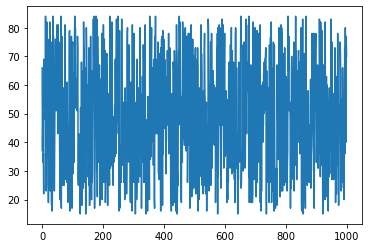

In [201]:
cyclistes.age.plot()

## 5.2) fonction "plot" en histogramme => regroupe les âges dans 10 (par défaut) catégories , 
et synthètise l'information  du nombre d'individu ayant l'âge de chaque catégorie

In [204]:
cyclistes.age.describe()

count    1000.000000
mean       48.341000
std        19.994712
min        15.000000
25%        31.000000
50%        46.000000
75%        66.000000
max        84.000000
Name: age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

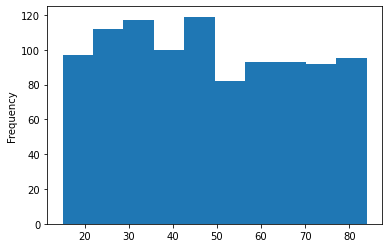

In [202]:
cyclistes.age.plot.hist()

## 5.3) scatter plot

In [210]:
cyclistes.columns

Index(['id', 'sexe', 'sportivite', 'age', 'sur_velo', 'est_adulte',
       'est_mineur'],
      dtype='object')

<AxesSubplot:xlabel='age', ylabel='sportivite'>

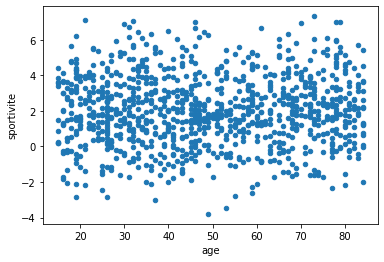

In [211]:
cyclistes.plot.scatter(x="age", y="sportivite")

## 5.4) afin de rajouter une perception visuelle j'ajoute une couleur par point
=> du vert pour les adultes, et de l'orange pour les mineurs

In [235]:
# on rajoute une colonne
cyclistes["couleur_pour_adulte"] = "green"

In [236]:
cyclistes["couleur_pour_adulte"][mineurs] = "orange"

<ipython-input-236-ffe81c6f9c56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyclistes["couleur_pour_adulte"][mineurs] = "orange"


<AxesSubplot:xlabel='age', ylabel='sportivite'>

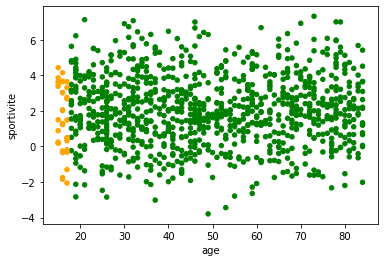

In [237]:
# on utilise le paramètre "c" qui prendra une colonne pour trouver la couleur à associer à chaque point
cyclistes.plot.scatter(x="age", y="sportivite", c="couleur_pour_adulte")

# 6) Pour info : sur une colonne on peut faire un "value_count" => qui nous renvoie le nombre d'occurence de chaque valeur

In [227]:
cyclistes["couleur_pour_adulte"].value_counts()

green     964
orange     36
Name: couleur_pour_adulte, dtype: int64

In [250]:
nb_de_personnes_ayant_un_age = cyclistes["age"].value_counts()#.plot.scatter()

In [251]:
nb_de_personnes_ayant_un_age

26    28
46    25
43    23
35    22
19    22
      ..
24     9
70     8
64     8
62     6
50     5
Name: age, Length: 70, dtype: int64

## 6.1) reset_index pour transformer le value_count en dataframe

In [252]:
nb_de_personnes_ayant_un_age.reset_index()

index  age
0      26   28
1      46   25
2      43   23
3      35   22
4      19   22
..    ...  ...
65     24    9
66     70    8
67     64    8
68     62    6
69     50    5

[70 rows x 2 columns]

In [253]:
df_nb_personne_par_age = nb_de_personnes_ayant_un_age.reset_index()

## 6.2) renommage des colonnes

In [254]:
df_nb_personne_par_age.columns = [ 'age', 'Nb_de_personnes',]

## 6.3) scatter plot

<AxesSubplot:xlabel='age', ylabel='Nb_de_personnes'>

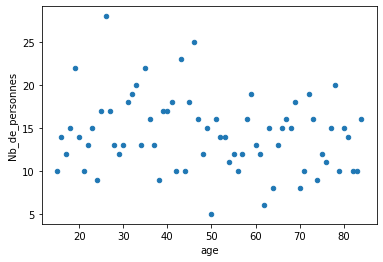

In [255]:
df_nb_personne_par_age.plot.scatter(x="age", y="Nb_de_personnes")

In [256]:
push("End of day 2")

<IPython.core.display.Javascript object>

git add .
git commit -m 'End of day 2'
git push
Fini.
